In [2]:
import pandas as pd

df = pd.read_csv('Testing/test_df.csv')

def label_encoder(label_col):
    codes = {}
    i = 0
    for label in label_col.drop_duplicates():
        codes['label'] = i
        label_col[label_col == label] = i
        i += 1
    return label_col


df.label = label_encoder(df.label)

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [3]:
df.iloc[50]

Unnamed: 0                                                     50
path                   Test Birdsounds/oxyura%20jamaicensis20.mp3
label                                                           3
duration                                                  15.1771
total_signal                                                5.992
timestamps      [[0.486, 0.972], [0.995, 1.527], [6.825, 8.283...
load_time                                                0.611583
load_time/s                                             0.0402963
Name: 50, dtype: object

In [4]:
def get_signal(audio, sr, timestamps):
    """ Extract and concatenate bird vocalizations at timesteps from audio"""
    # Convert timestamps from seconds to sample indeces
    timestamps = np.round(np.array(json.loads(timestamps)) * sr).astype(np.int)
    r = np.arange(audio.shape[0])
    try:
        mask = (timestamps[:,0][:,None] <= r) & (timestamps[:,1][:,None] >= r)
    except IndexError:
        print(f'Issue with slicing for audio length {r} and timestamps {timestamps}')
    # Signal as concatenation of all masked sections
    signal = audio.reshape(1, -1).repeat(mask.shape[0], axis = 0)[mask]
    return signal

In [15]:
import librosa
import librosa.display
import numpy as np
import json
from Spectrogram.spectrograms import stft_s
import matplotlib.pyplot as plt

def plot(df, idx):
    path = df.path[idx]
    timestamps = df.timestamps[idx]
    audio, sr = librosa.load(path)
    
    
    #signal = get_signal(audio, sr, timestamps)
    
    spec1 = np.log(stft_s(audio) + 1e-10)
    
    
    #spec2 = np.log(stft_s(signal) + 1e-10)
    
    
    librosa.display.specshow(spec1, y_axis='log', x_axis='time', sr=sr)
    plt.title('Spectrogram of original')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    


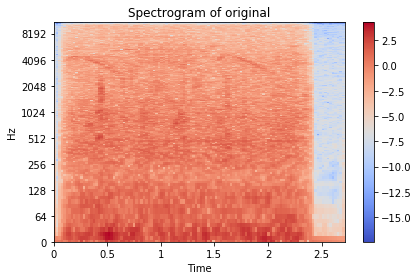

In [16]:
plot(df, 136)

In [ ]:
import IPython.display as ipd


In [11]:
def plot(df, idx):
    path = df.path[idx]
    timestamps = df.timestamps[idx]
    audio, sr = librosa.load(path)

    dur = len(audio) / sr
    spec1 = np.log(stft_s(audio) + 1e-10)
    
    len_spec = spec1.shape[1]
    ratio = len_spec/dur
    
    timestamps = np.round(np.array(json.loads(timestamps)) * ratio).astype(np.int)
    print(timestamps)
    r = np.arange(len_spec)
    mask = (timestamps[:,0][:,None] <= r) & (timestamps[:,1][:,None] >= r)
    vec = np.max(mask, axis = 0).reshape(1,-1)
    mask = np.repeat(vec, spec1.shape[0], axis =0)
    
    spec2 = np.where(mask == 1, spec1, spec1.min())
    
    
    fig = plt.figure(figsize=(25,8))
    librosa.display.specshow(spec1, y_axis='log', x_axis='time', sr=sr)
    plt.title('Spectrogram of original')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    
    fig = plt.figure(figsize=(25,8))
    librosa.display.specshow(spec2, y_axis='log', x_axis='time', sr=sr)
    plt.title('Mask of extracted signal')
    plt.colorbar()
    plt.tight_layout()
    plt.show() 
    return

In [12]:
plot(df, 136)

[]


IndexError: too many indices for array

In [214]:
def get_audio(df, idx):
    path = df.path[idx]
    timestamps = df.timestamps[idx]
    audio, sr = librosa.load(path)
    
    return audio, sr
audio, sr = get_audio(df, 123)
ipd.Audio(audio, rate=sr)


In [220]:
def get_signal_(df, idx):
    path = df.path[idx]
    timestamps = df.timestamps[idx]
    audio, sr = librosa.load(path)
    
    
    signal = get_signal(audio, sr, timestamps)
    
    return signal, sr

In [221]:

audio, sr = get_signal_(df, 123)

In [223]:
ipd.Audio(audio, rate=sr)
